In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #,Imputer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Read dataset
df = pd.read_csv('datasetwithoutexploit.csv')

In [3]:
# Groupement des classes
attack_group = {'Infilteration': 'Web attack', 
                'Fuzzers': 'Web attack',
                'Generic': 'Web attack',
                'injection': 'Web attack', 
                'Analysis': 'Web attack',
                'xss': 'Web attack',
                'Benign': 'BENIGN',
                'backdoor': 'BACKDOOR', 
                'scanning': 'SCANNING',
                'mitm': 'MITM', 
                'dos': 'DOS', 
                'ddos': 'DDOS', 
                'bruteforce': 'BRUTEFORCE', 
                'Theft': 'THEFT', 
                'Reconnaissance': 'RECON',
                'Shellcode': 'SHELLCODE',
                'ransomware': 'RANSOMWARE',
                'Bot': 'BOT',
                }
# Creation d'une colomne Attack catégorie
df['Attack_Category'] = df['Attack'].map(lambda x: attack_group[x])
df['Attack_Category'].value_counts()

BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BACKDOOR       2485
BRUTEFORCE     2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: Attack_Category, dtype: int64

In [4]:
df.Label.value_counts()

0    41002
1    40949
Name: Label, dtype: int64

In [5]:
df.Attack_Category.value_counts()

BENIGN        41002
Web attack    14667
DDOS           2506
SCANNING       2500
RECON          2498
DOS            2497
RANSOMWARE     2493
BOT            2489
BACKDOOR       2485
BRUTEFORCE     2485
MITM           2471
THEFT          2431
SHELLCODE      1427
Name: Attack_Category, dtype: int64

In [6]:
df.Attack.value_counts()

Benign            41002
ddos               2506
scanning           2500
Reconnaissance     2498
dos                2497
ransomware         2493
Infilteration      2491
Fuzzers            2490
Bot                2489
Generic            2487
backdoor           2485
bruteforce         2485
mitm               2471
xss                2457
injection          2443
Theft              2431
Analysis           2299
Shellcode          1427
Name: Attack, dtype: int64

In [15]:
df.describe()

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,NUM_PKTS_1024_TO_1514_BYTES,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label
count,81951.000000,81951.000000,81951.000000,81951.000000,8.195100e+04,81951.000000,8.195100e+04,81951.000000,81951.000000,81951.000000,...,81951.000000,81951.000000,81951.000000,81951.000000,81951.000000,81951.000000,81951.000000,81951.000000,81951.000000,81951.000000
mean,0.671904,0.072455,0.122625,0.090797,9.104098e-05,0.000183,1.356770e-04,0.000215,0.175316,0.160961,...,0.000189,0.136538,0.191289,0.060564,0.060568,0.123471,0.000598,0.000054,0.004335,0.499677
std,0.279401,0.179960,0.188175,0.190567,6.082379e-03,0.004271,8.454303e-03,0.005907,0.317781,0.318949,...,0.003593,0.205862,0.303630,0.190365,0.190381,0.257065,0.007467,0.000140,0.044079,0.500003
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.572580,0.000809,0.023529,0.000000,2.541565e-07,0.000000,2.030677e-07,0.000002,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.770336,0.001221,0.066667,0.000000,1.391334e-06,0.000020,6.092030e-07,0.000027,0.085202,0.008969,...,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.863867,0.051713,0.087719,0.029412,8.181419e-06,0.000089,6.092030e-06,0.000119,0.121076,0.121076,...,0.000000,0.132570,0.409659,0.000000,0.000000,0.015244,0.000031,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,0.365042,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.005258,0.994575,1.000000


In [7]:
cols = list(df)
cols.insert(43, cols.pop(cols.index('Attack')))
df = df.loc[:, cols]

In [8]:
df

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack_Category,Attack
0,0.582666,0.006790,0.023529,0.172269,0.000048,0.000264,0.000002,0.000246,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
1,0.583490,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
2,0.672023,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
3,0.523156,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
4,0.578912,0.006790,0.023529,0.172269,0.000024,0.000122,0.000001,0.000123,0.139013,0.121076,...,0.125002,0.0,0.0,0.0,0.0,0.0,0.0,1,RANSOMWARE,ransomware
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81946,0.643442,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81947,0.675822,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81948,0.642741,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance
81949,0.624186,0.001221,0.023529,0.028226,0.001525,0.000541,0.000018,0.000221,0.102804,0.030303,...,0.644208,0.0,0.0,0.0,0.0,0.0,0.0,1,RECON,Reconnaissance


### split train set and test set

In [9]:
X = df.drop(['Label','Attack','Attack_Category'],axis=1).values 
y = df.iloc[:, -3].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 42,stratify = y)
print(X_train.shape)
print(X_test.shape)

(65560, 41)
(16391, 41)


In [10]:
pd.Series(y_train).value_counts()

0    32801
1    32759
dtype: int64

### Training : Random Forest

In [11]:
val_score_train = []
val_score_test = []
k_range = range(1,30)
for k in k_range:
    model = RandomForestClassifier(n_estimators=k)
    model.fit(X_train, y_train)
    score_train=model.score(X_train,y_train)
    score_test=model.score(X_test, y_test)
    print(k," score train : ",score_train," score test : ",score_test)
    val_score_train.append(score_train)
    val_score_test.append(score_test)  

1  score train :  0.9996186699206834  score test :  0.9991458727350375
2  score train :  0.9998017083587554  score test :  0.9996339454578732
3  score train :  0.9998932275777913  score test :  0.9998779818192911
4  score train :  0.9999694935936546  score test :  0.9998779818192911
5  score train :  1.0  score test :  0.9998779818192911
6  score train :  1.0  score test :  0.9999389909096456
7  score train :  1.0  score test :  0.9999389909096456
8  score train :  1.0  score test :  1.0
9  score train :  1.0  score test :  0.9999389909096456
10  score train :  1.0  score test :  0.9999389909096456
11  score train :  1.0  score test :  0.9999389909096456
12  score train :  1.0  score test :  0.9999389909096456
13  score train :  1.0  score test :  0.9999389909096456
14  score train :  1.0  score test :  1.0
15  score train :  1.0  score test :  1.0
16  score train :  1.0  score test :  1.0
17  score train :  1.0  score test :  0.9999389909096456
18  score train :  1.0  score test :  1.

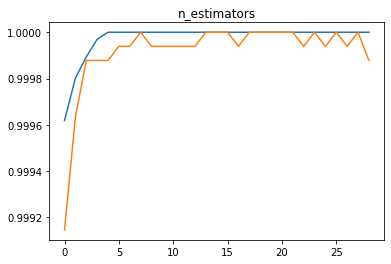

In [12]:
plt.title("n_estimators")
plt.plot(val_score_train)

plt.plot(val_score_test)
plt.show()

## Training Loop 

In [13]:
from sklearn.utils import shuffle

In [14]:
data_train=pd.DataFrame(X_train)
data_train['label']=y_train
start = time.time()

In [37]:
val_score=[]
model = RandomForestClassifier(n_estimators=11)
start = time.time()
for i in range(1,16):
    data_train=shuffle(data_train)
    X=data_train.iloc[:,:41] 
    y=data_train.iloc[:,41]
    model.fit(X,y) 
    score=model.score(X,y)
    print('EPOCH ',i,'\t ACCURACY= ',score)
    val_score.append(score)    
end = time.time()
training_time = end  - start

EPOCH  1 	 ACCURACY=  1.0
EPOCH  2 	 ACCURACY=  1.0
EPOCH  3 	 ACCURACY=  1.0
EPOCH  4 	 ACCURACY=  1.0
EPOCH  5 	 ACCURACY=  1.0
EPOCH  6 	 ACCURACY=  1.0
EPOCH  7 	 ACCURACY=  1.0
EPOCH  8 	 ACCURACY=  1.0
EPOCH  9 	 ACCURACY=  1.0
EPOCH  10 	 ACCURACY=  1.0
EPOCH  11 	 ACCURACY=  1.0
EPOCH  12 	 ACCURACY=  1.0
EPOCH  13 	 ACCURACY=  1.0
EPOCH  14 	 ACCURACY=  1.0
EPOCH  15 	 ACCURACY=  1.0


Text(0, 0.5, 'score')

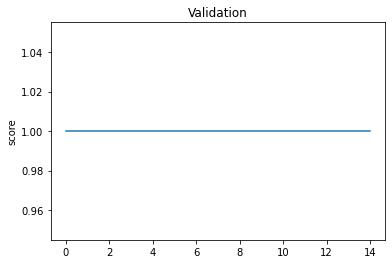

In [38]:
plt.plot(val_score)
plt.title('Validation')
plt.ylabel('score')

In [39]:
start = time.time()
y_predict=model.predict(X_test)
end = time.time()
predict_time = end  - start

In [41]:
print('temps entrainement: '+ str(training_time))
print('temps prediction: '+ str(predict_time))

temps entrainement: 12.539312601089478
temps prediction: 0.03103041648864746


In [42]:
precision,recall,fscore,none= precision_recall_fscore_support(y_test, y_predict, average='weighted') 
print('temps entrainement: '+ str(training_time))
print('temps prediction: '+ str(predict_time))
print("Exactitude de RF: {}".format(accuracy_score(y_test,y_predict)))
print('Précision de RF: '+(str(precision)))
print('Taux de détection de RF: '+(str(recall)))
print('F1-score de RF: '+(str(fscore)))
print("ERROR SCORE : {}".format(1-accuracy_score(y_test,y_predict)))

temps entrainement: 12.539312601089478
temps prediction: 0.03103041648864746
Exactitude de RF: 1.0
Précision de RF: 1.0
Taux de détection de RF: 1.0
F1-score de RF: 1.0
ERROR SCORE : 0.0


In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test, y_predict)
cm

array([[8201,    0],
       [   0, 8190]], dtype=int64)

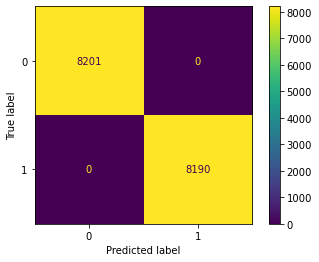

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()